# Cleaned dataset algorithms

In [134]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import balanced_accuracy_score, accuracy_score, confusion_matrix, classification_report

## Pre-processing data

In [86]:
# Read the optimised & cleaned CSV file from the Resources folder into a Pandas DataFrame
df = pd.read_csv(
    Path('stroke_cleaned_v2.csv')
)

# Review the DataFrame
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,stroke
0,9046,Male,67,0,1,Yes,Private,Urban,228.69,36.6,1
1,51676,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,1
2,31112,Male,80,0,1,Yes,Private,Rural,105.92,32.5,1
3,60182,Female,49,0,0,Yes,Private,Urban,171.23,34.4,1
4,1665,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,1


In [87]:
# Get dummies to convert all data to numerical data type
df = pd.get_dummies(df)
df.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban
0,9046,67,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1
1,51676,61,0,0,202.21,NaN,1,1,0,0,1,0,0,0,1,0,1,0
2,31112,80,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0
3,60182,49,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1
4,1665,79,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0


## Splitting the data into training and test data

In [88]:
# Separate the data into labels and features

# Separate the y variable, the labels from the 'stroke' column
y = df['stroke']

# Separate the X variable, the features by dropping the 'stroke' column
X = df.drop(columns='stroke')

In [89]:
# Review the y variable Series
y.ravel()

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

In [90]:
# Drop ID column
X = X.drop(columns='id')
# Convert NaN values in BMI to mean BMI
mean_bmi = X['bmi'].mean()
X['bmi'] = X['bmi'].fillna(mean_bmi)
#checking after filling the null values with mean
print("Number of missing values in 'bmi' after imputation:", X['bmi'].isnull().sum())

Number of missing values in 'bmi' after imputation: 0


In [91]:
# Review the X variable DataFrame
X

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,residence_type_Rural,residence_type_Urban
0,67,0,1,228.69,36.60000,0,1,0,1,0,0,1,0,0,0,1
1,61,0,0,202.21,28.89456,1,0,0,1,0,0,0,1,0,1,0
2,80,0,1,105.92,32.50000,0,1,0,1,0,0,1,0,0,1,0
3,49,0,0,171.23,34.40000,1,0,0,1,0,0,1,0,0,0,1
4,79,1,0,174.12,24.00000,1,0,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5104,2,0,0,109.33,18.20000,1,0,1,0,0,0,0,0,1,0,1
5105,2,0,0,107.02,28.89456,0,1,1,0,0,0,0,0,1,1,0
5106,2,0,0,61.94,20.30000,1,0,1,0,0,0,0,0,1,1,0
5107,2,0,0,77.28,17.10000,0,1,1,0,0,0,0,0,1,0,1


In [92]:
# Check the balance of our target values
y.value_counts()

0    4860
1     249
Name: stroke, dtype: int64

## Oversampling data

In [93]:
# Split the data using train_test_split
# Assign a random_state of 78 to the function
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [94]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(sampling_strategy='minority', random_state=78)

# Fit the original training data to the random_oversampler model
x_res, y_res = ros.fit_resample(X_train, y_train)

In [95]:
# Count the distinct values of the resampled labels data
y_res.value_counts()

0    3650
1    3650
Name: stroke, dtype: int64

In [96]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [97]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [98]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Using Random Forest Classifier Algorithm

In [99]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [100]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [101]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [102]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [103]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1205,5
Actual 1,67,1


Accuracy Score : 0.9436619718309859
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1210
           1       0.17      0.01      0.03        68

    accuracy                           0.94      1278
   macro avg       0.56      0.51      0.50      1278
weighted avg       0.91      0.94      0.92      1278



<Axes: title={'center': 'Features Importances'}, ylabel='1'>

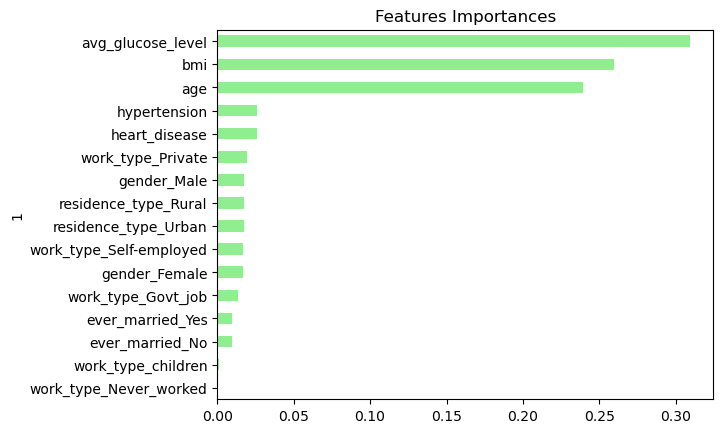

In [104]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)

In [105]:
# Drop less-important columns
columns_to_drop = ['hypertension', 'heart_disease', 'work_type_Private', 'work_type_Self-employed', 'work_type_Govt_job',
                   'work_type_children', 'work_type_Never_worked', 'gender_Male', 'gender_Female', 'residence_type_Rural',
                   'residence_type_Urban', 'ever_married_Yes', 'ever_married_No']

X2 = X.drop(columns=columns_to_drop)

## Oversampling data

In [107]:
# check X has all columns dropped that we wanted to drop
X2

,age,avg_glucose_level,bmi
0,67,228.69,36.60000
1,61,202.21,28.89456
2,80,105.92,32.50000
3,49,171.23,34.40000
4,79,174.12,24.00000
...,...,...,...
5104,2,109.33,18.20000
5105,2,107.02,28.89456
5106,2,61.94,20.30000
5107,2,77.28,17.10000


In [108]:
# Split the data using train_test_split
# Assign a random_state of 78 to the function
X_train, X_test, y_train, y_test = train_test_split(X2, y, random_state=78)

In [109]:
# Import the RandomOverSampler module form imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

# Instantiate the random oversampler model
# # Assign a random_state parameter of 1 to the model
ros = RandomOverSampler(sampling_strategy='minority', random_state=78)

# Fit the original training data to the random_oversampler model
x_res, y_res = ros.fit_resample(X_train, y_train)

In [110]:
# Count the distinct values of the resampled labels data
y_res.value_counts()

0    3650
1    3650
Name: stroke, dtype: int64

In [111]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [113]:
# Fitting Standard Scaller
X_scaler = scaler.fit(X_train)

In [114]:
# Scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Using Random Forest Classifier Algorithm on the smaller dataframe

In [115]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [116]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [117]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [118]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [119]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1204,6
Actual 1,67,1


Accuracy Score : 0.9428794992175273
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1210
           1       0.14      0.01      0.03        68

    accuracy                           0.94      1278
   macro avg       0.55      0.50      0.50      1278
weighted avg       0.90      0.94      0.92      1278



## Random Forest Classifier optimised using GridSearchCV

In [141]:
# Initialising GridSearchCV() object and fitting it with hyperparameters

forest_params = [{'max_depth': list(range(1, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='recall')

clf.fit(X_train, y_train)

KeyboardInterrupt: 

In [138]:
print(clf.best_params_)

print(clf.best_score_)

{'max_depth': 11, 'max_features': 7}
0.9527557930809399


In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 78)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 78,
 'verbose': 0,
 'warm_start': False}


In [163]:
# Create a random forest classifier
rf_model = RandomForestClassifier(max_features=7, max_depth=11, n_estimators=100, random_state=78)

In [164]:
# Fitting the model
rf_model = rf_model.fit(X_train_scaled, y_train)

In [165]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)

In [166]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [167]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,1206,4
Actual 1,67,1


Accuracy Score : 0.9444444444444444
Classification Report
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1210
           1       0.20      0.01      0.03        68

    accuracy                           0.94      1278
   macro avg       0.57      0.51      0.50      1278
weighted avg       0.91      0.94      0.92      1278

